<a href="https://colab.research.google.com/github/supawat6481355/iccs205-205/blob/main/hw3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3 Interpolation and Trapezoid Rule.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, exp, pi, sqrt
import math

1) Find lagrange polynomial that passes through these points. Plot the polynomial line along with the points.

Lagrange Polynomial:
          4          3         2
-0.02641 x + 0.6203 x - 3.927 x + 7.698 x - 2.365


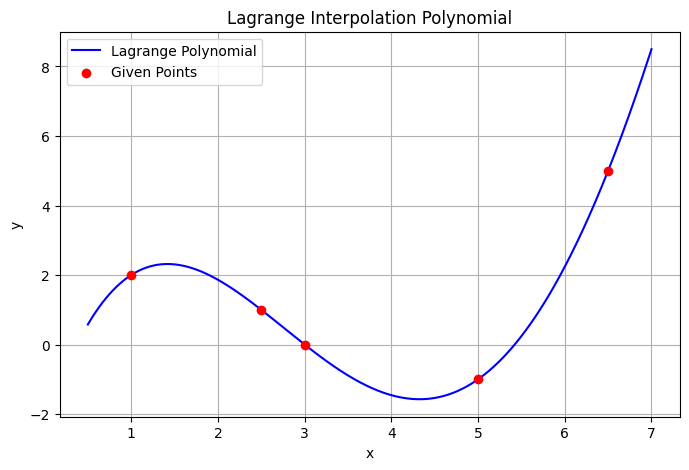

In [3]:
from scipy.interpolate import lagrange
xs = [1,2.5, 3,  5, 6,6.5]
ys = [2,  1, 0, -1, 3,  5]

xs = np.array([1, 2.5, 3, 5, 6.5])
ys = np.array([2, 1, 0, -1, 5])

poly = lagrange(xs, ys)

print("Lagrange Polynomial:")
print(poly)

x_new = np.linspace(min(xs)-0.5, max(xs)+0.5, 500)
y_new = poly(x_new)

plt.figure(figsize=(8, 5))
plt.plot(x_new, y_new, label="Lagrange Polynomial", color='blue')
plt.scatter(xs, ys, color='red', label="Given Points", zorder=5)
plt.title("Lagrange Interpolation Polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

2) Compute the following integral using trapezoid rule with 100 pieces. (Trust me, don't try to do it by hand.)
$$\int \limits_{x=0}^{x=\pi} x^2\sin(x^2)\;dx$$

In [4]:
def func(x):
    return x**2 * sin(x**2)

a = 0
b = pi
n = 100
h = (b - a) / n

integral = (func(a) + func(b)) / 2.0
for i in range(1, n):
    integral += func(a + i * h)

integral *= h

print(f"The approximate value of the integral using the trapezoidal rule with {n} pieces is: {integral}")

The approximate value of the integral using the trapezoidal rule with 100 pieces is: 1.6959516978046734


3) In the class, we learned how to do integral where the limit is finite. Sometimes we need to do the integral when the limit is not finite. For example, a lot of time in statistic we need to evaluate the integral of normal distribution function
$$f(t) = \frac{1}{\sqrt{\pi}} e^{-t^2}$$
from $x$ to certain point $\infty$. From statistics you will see a table for complementary error function like one you found here(see page2) http://www.geophysik.uni-muenchen.de/~malservisi/GlobaleGeophysik2/erf_tables.pdf

$$ erfc(x) = \int \limits_{t=x}^{t=\infty} \frac{2}{\sqrt{\pi}} e^{-t^2} \; dt $$

If you try to use trapezoid rule directly with this you will find that computer has problem with understanding $\infty$. Thus, we need to do a change to variable such that it turns the improper integral into a proper integral.

Remember that $\tan(\pi/2) = \infty$, if we let $$ t = \tan(u)$$ then the integral above becomes

$$ erfc(x) = \int \limits_{u=\arctan(x)}^{u=\frac{\pi}{2}} \frac{2}{\sqrt{\pi}} \frac{e^{-\tan(u)^2}}{  \cos(u)^2} \;du $$

Even though it looks much scarier than before, all the $\infty$ are gone. However, using trapezoid rule for all pieces is bad since the right end point still has $e^{-\infty}/0$; computer will scream at this.

We can avoid that trouble by first subdivide this into many pieces. Then, we use trapezoid rule for all pieces except the right most piece at $\frac{\pi}{2}$. For this piece, we can use mid-point rule $A = f((l+r)/2)h$ instead.

Your job for this problem is to find the value for $erfc(0)$, $erfc(0.5)$, $erfc(1.0)$ and $erfc(1.5)$.  Pick appropriate number of subdivisions. You should get something very close to the table.

This is actually a general techique for dealing with infinity in numerical computation: try $\tan(u)$ first. Sometimes we use sigmoid function instead because of some of its nice property, you will see some of the use in Pattern Recognition. It should be noted that there is actually a better but adhoc way to avoid imporoper integral for normal distribution but we won't go there.

In [8]:
def erfc_via_tan(x, n=4000):

    ul, ur = math.atan(x), math.pi/2
    h = (ur - ul) / n

    def g(u):

        t = math.tan(u)
        c = math.cos(u)
        return (2.0 / math.sqrt(math.pi)) * math.exp(-(t*t)) / (c*c)

    s = 0.5*g(ul) + sum(g(ul + k*h) for k in range(1, n-1)) + 0.5*g(ul + (n-1)*h)
    trap_part = h * s

    u_last_left = ul + (n-1)*h
    last_panel = h * g(u_last_left + 0.5*h)

    return trap_part + last_panel

4) In the class, you learn a bunch of tools. But, in the homework, I need you to be a little bit creative and use all you have learned to solve a seemingly random problem.

Let us consider semi-circular paper of radius 2 . The area of the whole paper is $2\pi \approx 6.28$.
We want to cut a chord(red line) from this paper such that the area of the leftover paper(shown in blue) is $4.0$. Where should I cut the chord (find the value of $x$ where the red line should be such that the area of the blue region is $4.0$? Try to get a decent answer.

If you are good with geometry you can actually figure this one out analytically, but I want you to do it numerically using what we have learned so far.

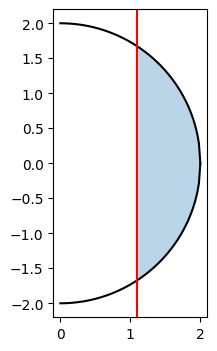

In [11]:
def circ_top(x, r=2.):
    return sqrt(r**2 - x**2)
def circ_bot(x, r=2.):
    return -sqrt(r**2 - x**2)

x=np.linspace(0,2,100)
y_top = [circ_top(xx) for xx in x]
y_bot = [circ_bot(xx) for xx in x]
ax= plt.figure(figsize=(4,4))
plt.gca().set_aspect('equal') #get current axis and set aspect ratio
plt.plot(x, y_top, 'k-')
plt.plot(x, y_bot, 'k-')
plt.axvline(1.1,color='red')
plt.fill_between(x,y_top,y_bot,where=x>1.1,alpha=0.3)

In [12]:
from scipy.integrate import quad
from scipy.optimize import fsolve

def circ_top(x, r=2.):
    return sqrt(r**2 - x**2)

def blue_area(x, target_area=4.0, r=2.0):

    area_top, _ = quad(circ_top, x, r, args=(r,))
    return 2 * area_top - target_area

initial_guess = 1.5
x_solution = fsolve(blue_area, initial_guess)

print(f"The chord should be cut at x = {x_solution[0]:.4f} to have a blue area of 4.0")

area_at_solution, _ = quad(circ_top, x_solution[0], 2, args=(2,))
print(f"Area of the blue region at x = {x_solution[0]:.4f}: {2 * area_at_solution:.4f}")

The chord should be cut at x = 0.5790 to have a blue area of 4.0
Area of the blue region at x = 0.5790: 4.0000


### Problem 5 Fourier
5) Fourier Series is one of the most useful mathematical fact in real life. You can look up wikipedia on where it gets used. The claim is quite simple. Similar to Taylor series, Fourier claims/prove that all preriodic functions can be written as a sum of sine and cosine of varying frequency. For function of period $2L$, the sum can be written as

$$f(x) = \frac{a_0}{2} + a_1 \cos(\pi \frac{x}{L}) + a_2\cos(2\pi \frac{x}{L}) + a_3 \cos(3 \pi \frac{x}{L}) + \ldots\\
+b_1 \sin(\pi \frac{x}{L}) + b_2\sin(2\pi \frac{x}{L}) + b_3 \sin(3 \pi \frac{x}{L}) + \ldots$$





Before it gets too abstract, the cell below show how similar the sawtooth function is to the sum of a few sine and cosine.

The function below is sawtooth function with period of 2(it repeats itself every length 2). Since the period is $2L$, $L=1$. That means we expect

$$sawtooth(x) \approx \frac{a_0}{2} + a_1 \cos(\pi x) + a_2\cos(2\pi x) + a_3 \cos(3 \pi x) + \ldots\\
+b_1 \sin(\pi x) + b_2\sin(2\pi x) + b_3 \sin(3 \pi x) + \ldots$$

We will learn the magical power that helps us figure out $a$'s and $b$'s later. Let us compare it with
$$magic(x) = 1 - \frac{2}{\pi}\sin(\pi x) -\frac{2}{2\pi}\sin(2\pi x) - \frac{2}{3\pi}\sin(3\pi x) - \ldots$$
which means that $a_0=2$, $\displaystyle b_i = -\frac{2}{i\pi}$ and $a_1=a_2=\ldots=0$.

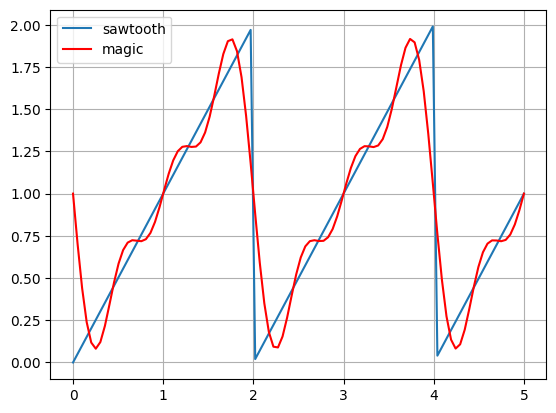

In [13]:
def sawtooth(x):
    return x%2 #only works in python. other languages will scream.

x = np.linspace(0,5,100)
y = [sawtooth(xx) for xx in x]
plt.plot(x,y,label='sawtooth')
plt.grid()

def magic(x):
    s = 0
    s += 1
    s += -2/pi*sin(pi*x) - 2/2./pi*sin(2*pi*x) - 2/3./pi*sin(3*pi*x)
    return s
magical_y = [magic(xx) for xx in x]
plt.plot(x, magical_y,'r-',label='magic')
plt.legend(loc='upper left')

Let us talk about how the magic of figuring out $a$ and $b$. We can show that

$$a_i = \frac{1}{L}\int \limits_{x=0}^{x=2L} f(x)\cos(i \pi \frac{x}{L})\; dx $$


$$b_i = \frac{1}{L}\int \limits_{x=0}^{x=2L} f(x)\sin(i \pi \frac{x}{L})\; dx $$
You can actually prove this with basic calculus. The trick is pretty neat. See http://mathworld.wolfram.com/FourierSeries.html or various youtube videos on how to prove this.

For example, in the sawtooth example above($L=1$), $b_2$ was found by using

$$ b_2 =  \int \limits_{x=0}^{x=2L} sawtooth(x)\sin(2 \pi \frac{x}{L})\; dx $$

5.1) Consider the function below. Find $a_0, a_1, a_2, a_3$ and $b_1, b_2, b_3$ and plot the fourier approximation using these terms along with the original function. Your plot should look similar to the one shown for sawtooth. Do not forget to change $L$ to appropriate value.

I recommend you writing a nice function to figure out $a$ and $b$.

(-0.1, 1.1)

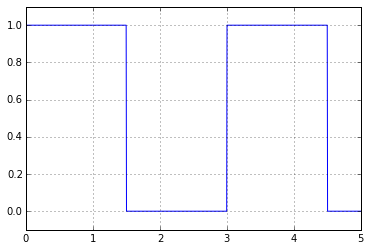

In [ ]:
def step(x):
    return 0.0 if x%3>(3./2) else 1.0
x = np.linspace(0,5,1000)
y = [step(xx) for xx in x]
plt.plot(x,y,label='step')
plt.grid()
plt.ylim(-0.1,1.1)

a0 = 1.0000
a1 = 0.0000
a2 = -0.0000
a3 = 0.0000
b1 = 0.6366
b2 = -0.0000
b3 = 0.2122


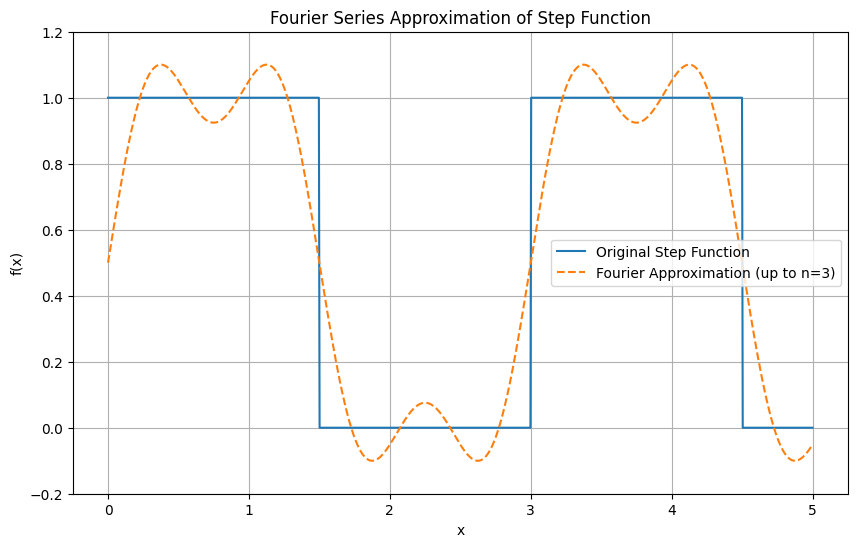

In [14]:
from scipy.integrate import quad

def step(x):
    return 0.0 if x%3>(3./2) else 1.0

L = 1.5
period = 2 * L

def a_n(n):
    if n == 0:
        integrand = lambda x: step(x)
    else:
        integrand = lambda x: step(x) * math.cos(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    if n == 0:
        return (1/L) * integral_val
    else:
        return (1/L) * integral_val

def b_n(n):
    integrand = lambda x: step(x) * math.sin(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    return (1/L) * integral_val

a0 = a_n(0)
a1 = a_n(1)
a2 = a_n(2)
a3 = a_n(3)

b1 = b_n(1)
b2 = b_n(2)
b3 = b_n(3)

print(f"a0 = {a0:.4f}")
print(f"a1 = {a1:.4f}")
print(f"a2 = {a2:.4f}")
print(f"a3 = {a3:.4f}")
print(f"b1 = {b1:.4f}")
print(f"b2 = {b2:.4f}")
print(f"b3 = {b3:.4f}")

x = np.linspace(0, 5, 1000)
y_original = [step(xx) for xx in x]

def fourier_approx(x_val):
    approx = a0/2
    approx += a1 * math.cos(pi * x_val / L) + a2 * math.cos(2 * pi * x_val / L) + a3 * math.cos(3 * pi * x_val / L)
    approx += b1 * math.sin(pi * x_val / L) + b2 * math.sin(2 * pi * x_val / L) + b3 * math.sin(3 * pi * x_val / L)
    return approx

y_approx = [fourier_approx(xx) for xx in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y_original, label='Original Step Function')
plt.plot(x, y_approx, label='Fourier Approximation (up to n=3)', linestyle='--')
plt.title('Fourier Series Approximation of Step Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-0.2, 1.2)
plt.show()

5.2) Do 5.1 but now with $a_0, a_1, \ldots, a_{10}$ and $b_1, b_2, \ldots b_{10}$

Fourier Coefficients:
a0 = 1.0000
a1 = 0.0000, b1 = 0.6366
a2 = -0.0000, b2 = -0.0000
a3 = 0.0000, b3 = 0.2122
a4 = -0.0000, b4 = -0.0000
a5 = 0.0000, b5 = 0.1273
a6 = 0.0000, b6 = 0.0000
a7 = 0.0000, b7 = 0.0909
a8 = -0.0000, b8 = 0.0000
a9 = -0.0000, b9 = 0.0707
a10 = -0.0000, b10 = 0.0000


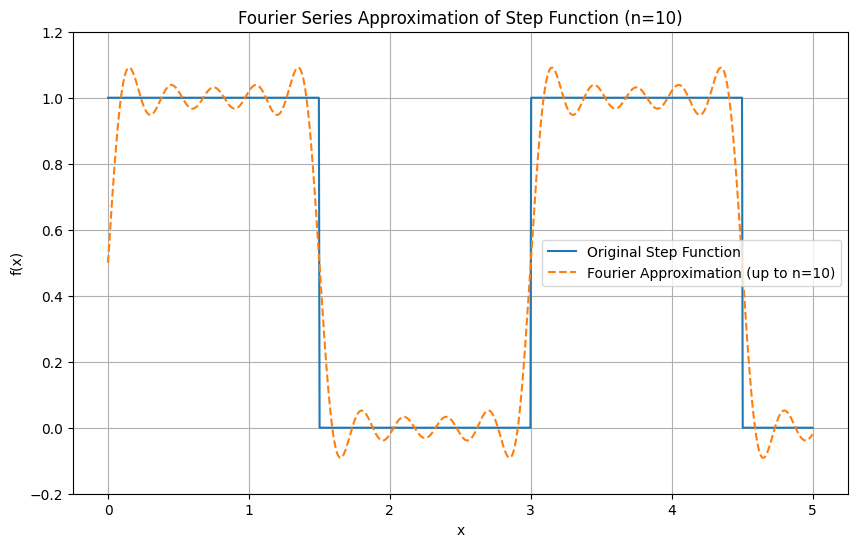

In [17]:
def step(x):
    return 0.0 if x%3>(3./2) else 1.0

L = 1.5
period = 2 * L

def a_n(n):
    if n == 0:
        integrand = lambda x: step(x)
    else:
        integrand = lambda x: step(x) * math.cos(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    if n == 0:
        return (1/L) * integral_val
    else:
        return (1/L) * integral_val


def b_n(n):
    integrand = lambda x: step(x) * math.sin(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    return (1/L) * integral_val

a_coeffs = [a_n(i) for i in range(11)]
b_coeffs = [b_n(i) for i in range(1, 11)]


print("Fourier Coefficients:")
print(f"a0 = {a_coeffs[0]:.4f}")
for i in range(1, 11):
    print(f"a{i} = {a_coeffs[i]:.4f}, b{i} = {b_coeffs[i-1]:.4f}")


x = np.linspace(0, 5, 1000)
y_original = [step(xx) for xx in x]

def fourier_approx_10(x_val):
    approx = a_coeffs[0]/2
    for i in range(1, 11):
        approx += a_coeffs[i] * math.cos(i * pi * x_val / L) + b_coeffs[i-1] * math.sin(i * pi * x_val / L)
    return approx

y_approx = [fourier_approx_10(xx) for xx in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y_original, label='Original Step Function')
plt.plot(x, y_approx, label='Fourier Approximation (up to n=10)', linestyle='--')
plt.title('Fourier Series Approximation of Step Function (n=10)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-0.2, 1.2)
plt.show()

5.3) Consider the function below. Find $a_0, a_1, a_2, a_3$ and $b_1, b_2, b_3$ and plot the fourier approximation using these terms along with the original function. Your plot should look similar to the one shown for sawtooth. Do not forget to change $L$ to appropriate value.

(-0.1, 1.1)

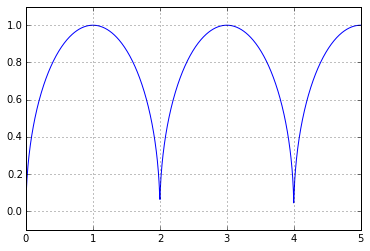

In [ ]:
def circ(x):
    r = 1
    xx = (x%(2*r))
    return sqrt(r**2-(xx-r)**2)
x = np.linspace(0,5,1000)
y = [circ(xx) for xx in x]
plt.plot(x,y,label='step')
plt.grid()
plt.ylim(-0.1,1.1)

a0 = 1.5708
a1 = -0.2846
a2 = -0.1062
a3 = -0.0589
b1 = 0.0000
b2 = -0.0000
b3 = 0.0000


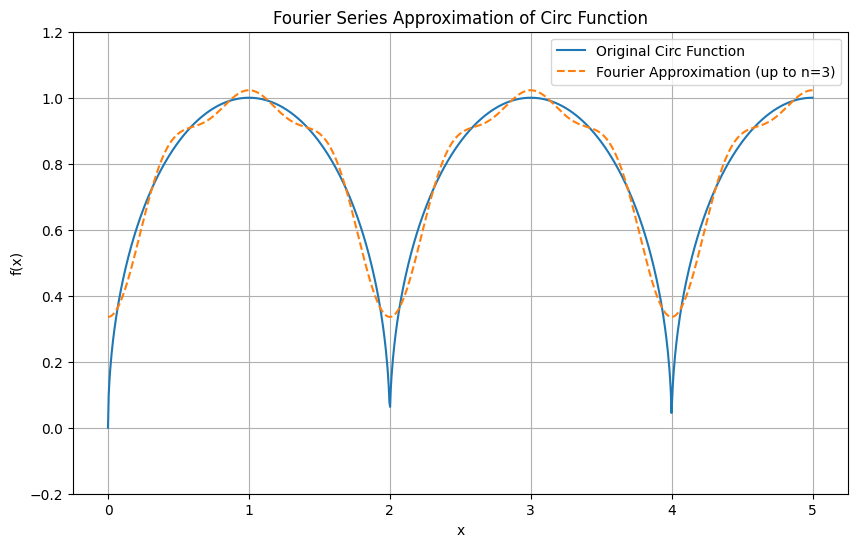

In [19]:
def circ(x):
    r = 1
    xx = (x%(2*r))
    if r**2 - (xx-r)**2 < 0:
        return 0.0
    return sqrt(r**2-(xx-r)**2)

L = 1.0
period = 2 * L

def a_n(n):
    if n == 0:
        integrand = lambda x: circ(x)
    else:
        integrand = lambda x: circ(x) * math.cos(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    if n == 0:
        return (1/L) * integral_val
    else:
        return (1/L) * integral_val

def b_n(n):
    integrand = lambda x: circ(x) * math.sin(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    return (1/L) * integral_val

a0 = a_n(0)
a1 = a_n(1)
a2 = a_n(2)
a3 = a_n(3)

b1 = b_n(1)
b2 = b_n(2)
b3 = b_n(3)

print(f"a0 = {a0:.4f}")
print(f"a1 = {a1:.4f}")
print(f"a2 = {a2:.4f}")
print(f"a3 = {a3:.4f}")
print(f"b1 = {b1:.4f}")
print(f"b2 = {b2:.4f}")
print(f"b3 = {b3:.4f}")

x = np.linspace(0, 5, 1000)
y_original = [circ(xx) for xx in x]

def fourier_approx(x_val):
    approx = a0/2
    approx += a1 * math.cos(pi * x_val / L) + a2 * math.cos(2 * pi * x_val / L) + a3 * math.cos(3 * pi * x_val / L)
    approx += b1 * math.sin(pi * x_val / L) + b2 * math.sin(2 * pi * x_val / L) + b3 * math.sin(3 * pi * x_val / L)
    return approx

y_approx = [fourier_approx(xx) for xx in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y_original, label='Original Circ Function')
plt.plot(x, y_approx, label='Fourier Approximation (up to n=3)', linestyle='--')
plt.title('Fourier Series Approximation of Circ Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-0.2, 1.2)
plt.show()

5.4) Do 5.3 but now with $a_0, a_1, \ldots, a_{10}$ and $ b_1, b_2, \ldots b_{10}$

Fourier Coefficients:
a0 = 1.5708
a1 = -0.2846, b1 = 0.0000
a2 = -0.1062, b2 = -0.0000
a3 = -0.0589, b3 = 0.0000
a4 = -0.0386, b4 = -0.0000
a5 = -0.0278, b5 = 0.0000
a6 = -0.0212, b6 = 0.0000
a7 = -0.0169, b7 = -0.0000
a8 = -0.0139, b8 = 0.0000
a9 = -0.0116, b9 = 0.0000
a10 = -0.0099, b10 = -0.0000


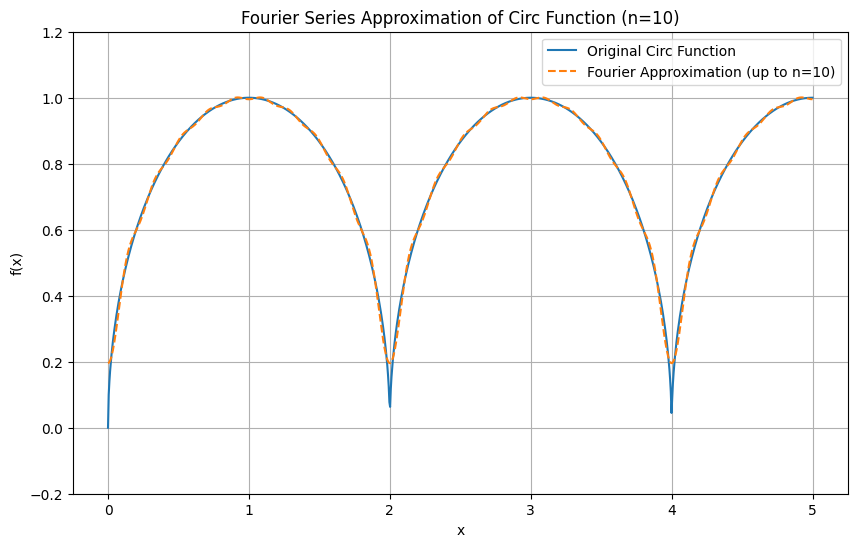

In [21]:
def circ(x):
    r = 1
    xx = (x%(2*r))
    if r**2 - (xx-r)**2 < 0:
        return 0.0
    return sqrt(r**2-(xx-r)**2)

L = 1.0
period = 2 * L

def a_n(n):
    if n == 0:
        integrand = lambda x: circ(x)
    else:
        integrand = lambda x: circ(x) * math.cos(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    if n == 0:
        return (1/L) * integral_val
    else:
        return (1/L) * integral_val

def b_n(n):
    integrand = lambda x: circ(x) * math.sin(n * math.pi * x / L)
    integral_val, _ = quad(integrand, 0, period)
    return (1/L) * integral_val

a_coeffs = [a_n(i) for i in range(11)]
b_coeffs = [b_n(i) for i in range(1, 11)]


print("Fourier Coefficients:")
print(f"a0 = {a_coeffs[0]:.4f}")
for i in range(1, 11):
    print(f"a{i} = {a_coeffs[i]:.4f}, b{i} = {b_coeffs[i-1]:.4f}")

x = np.linspace(0, 5, 1000)
y_original = [circ(xx) for xx in x]

def fourier_approx_10(x_val):
    approx = a_coeffs[0]/2
    for i in range(1, 11):
        approx += a_coeffs[i] * math.cos(i * pi * x_val / L) + b_coeffs[i-1] * math.sin(i * pi * x_val / L)
    return approx

y_approx = [fourier_approx_10(xx) for xx in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y_original, label='Original Circ Function')
plt.plot(x, y_approx, label='Fourier Approximation (up to n=10)', linestyle='--')
plt.title('Fourier Series Approximation of Circ Function (n=10)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-0.2, 1.2)
plt.show()

### 6 Sum of $i^k$


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use lagrange polynomial to find it.

#### Problem


Use what you learn about Lagrange Method and write a function that takes in $n$ and $k$ and calculate $$\sum_{i=1}^n i^k$$ in $O(k)$ (*NOT* $O(n)$).

##### Warning: don't try to sum up too far as it can cause integer overflow.

In [26]:
def sum_of_powers(n, k):

    if k < 0:
        return
    if n < 1:
        return 0

    xs = np.arange(1, k + 3)
    ys = [sum(i**k for i in range(1, x + 1)) for x in xs]

    poly = lagrange(xs, ys)

    return poly(n)

print(f"Sum of i^1 from 1 to 10: {int(sum_of_powers(10, 1))}")
print(f"Sum of i^2 from 1 to 10: {int(sum_of_powers(10, 2))}")
print(f"Sum of i^3 from 1 to 10: {int(sum_of_powers(10, 3))}")
print(f"Sum of i^0 from 1 to 5: {int(sum_of_powers(5, 0))}")

Sum of i^1 from 1 to 10: 55
Sum of i^2 from 1 to 10: 385
Sum of i^3 from 1 to 10: 3025
Sum of i^0 from 1 to 5: 5
